<a href="https://colab.research.google.com/github/freebird-9/repo_1/blob/main/Clustering_Algorithms_for_Gear_ratio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [ ]:
dataset = pd.read_csv('carnot.csv')
dataset.head(5)

,Id,Speed,RPM,Engine Load
0,131505,7,898,44
1,133384,7,898,44
2,131504,1,917,32
3,133424,1,917,32
4,131503,0,774,38


Data Exploration

In [ ]:
dataset.describe()

,Id,Speed,RPM,Engine Load
count,13726.000000,13726.000000,13726.000000,13726.000000
mean,454117.188912,28.282821,1224.099301,31.287119
std,217035.672940,22.714017,504.335148,22.677319
min,131501.000000,0.000000,0.000000,0.000000
25%,269089.250000,7.000000,894.000000,10.000000
50%,378304.500000,27.000000,1295.000000,32.000000
75%,673087.750000,47.000000,1586.000000,47.000000
max,778837.000000,200.000000,3290.000000,100.000000


In [ ]:
dataset.shape

(13726, 4)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13726 entries, 0 to 13725
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Id           13726 non-null  int64
 1   Speed        13726 non-null  int64
 2   RPM          13726 non-null  int64
 3   Engine Load  13726 non-null  int64
dtypes: int64(4)
memory usage: 429.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa1724a3fd0>,
      dtype=object)

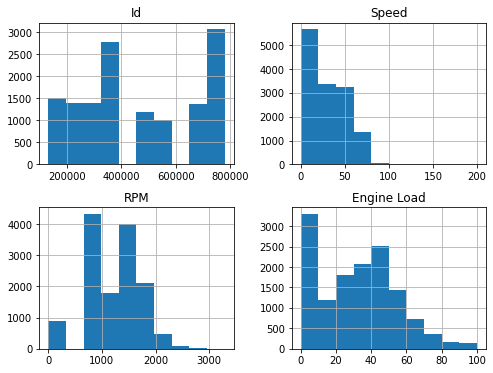

In [ ]:
dataset.hist(figsize = (8,6))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


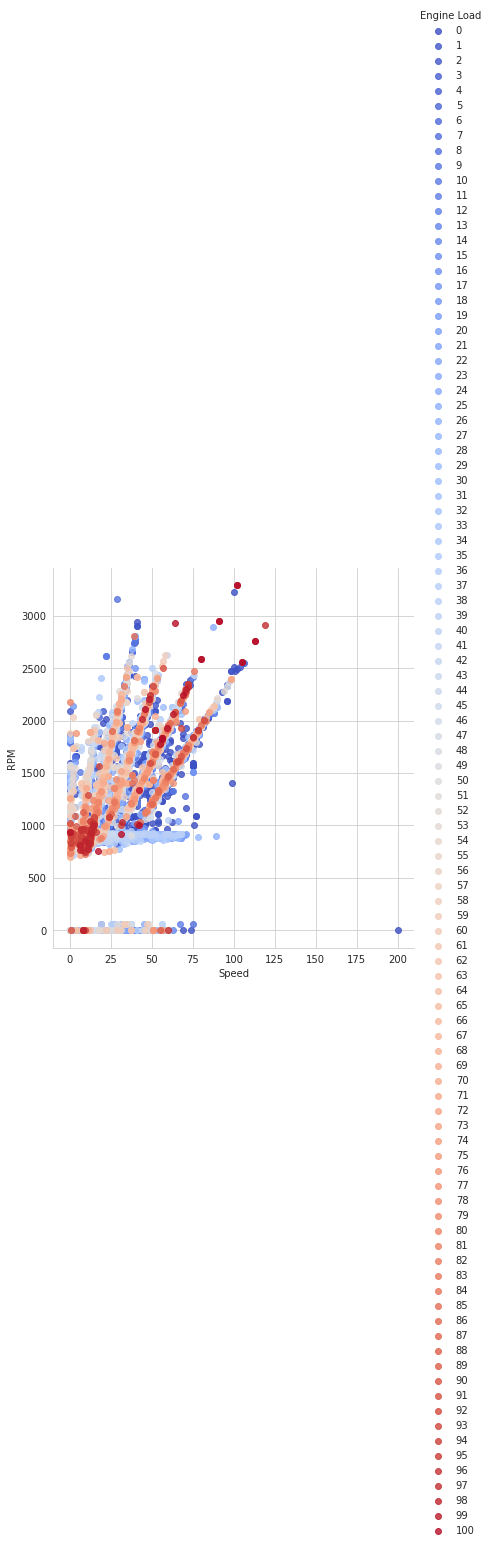

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('Speed','RPM',data= dataset, hue='Engine Load',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [ ]:
dataset.corr()

,Id,Speed,RPM,Engine Load
Id,1.000000,-0.026668,-0.018438,-0.004294
Speed,-0.026668,1.000000,0.697804,-0.132801
RPM,-0.018438,0.697804,1.000000,0.035451
Engine Load,-0.004294,-0.132801,0.035451,1.000000


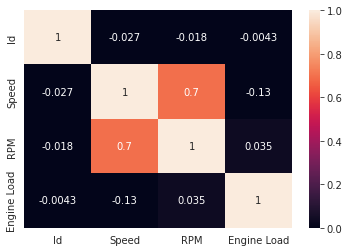

In [ ]:
sns.heatmap(data = dataset.corr(), vmin=0, vmax=1, annot = True)

Dropping Engine load and Id column. Also, rows with speed =0 and RPM =0

In [ ]:
df1 = dataset.drop(columns = ['Id'], axis =1)
df1

,Speed,RPM,Engine Load
0,7,898,44
1,7,898,44
2,1,917,32
3,1,917,32
4,0,774,38
...,...,...,...
13721,0,0,0
13722,0,0,0
13723,0,0,0
13724,0,0,0


In [ ]:
df2 = df1[dataset.RPM != 0]#removing RPM =0 from dataset
df2.shape

(12920, 3)

In [ ]:
df3 = df2[df2.Speed !=0] #removing speed = 0 from dataset
df3.shape

(11045, 3)

In [ ]:
df3.describe()

,Speed,RPM,Engine Load
count,11045.000000,11045.000000,11045.000000
mean,34.896605,1384.762517,31.280579
std,20.088233,384.885607,22.798631
min,1.000000,3.000000,0.000000
25%,18.000000,1027.000000,12.000000
50%,34.000000,1418.000000,31.000000
75%,51.000000,1637.000000,46.000000
max,119.000000,3290.000000,100.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa16cf79050>,
      dtype=object)

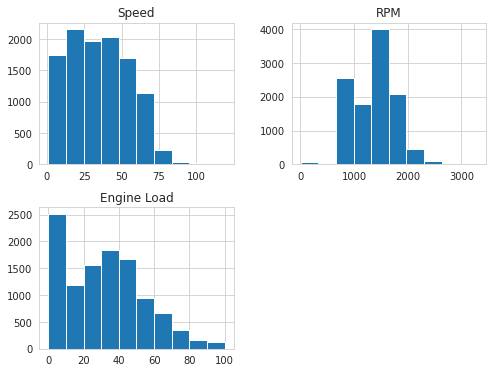

In [ ]:
df3.hist(figsize = (8,6))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


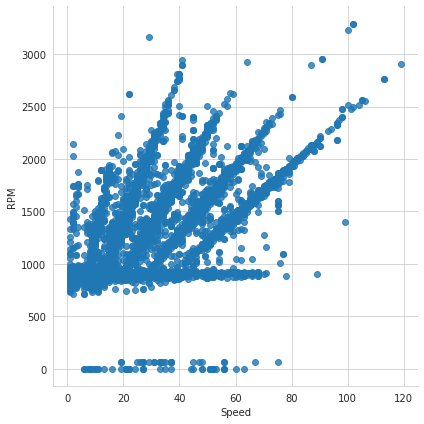

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('Speed','RPM',data= df3, 
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

Outlier detection using IQR

In [ ]:
Q1 = np.percentile(df3['Speed'], 25) 
Q2 = np.percentile(df3['Speed'], 50) 
Q3 = np.percentile(df3['Speed'], 75) 
IQR = Q3 - Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)

18.0
34.0
51.0
33.0


In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is -31.5
up_limit is 100.5


In [ ]:
outlier =[]
for x in df3['Speed']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the speed col is', outlier)

 outlier in the speed col is [102, 102, 105, 105, 113, 113, 119, 102, 104, 106, 101]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


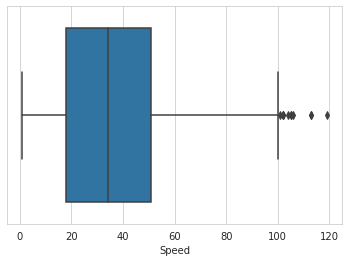

In [ ]:

sns.boxplot(df3['Speed'])

In [ ]:
df3 = df3[df3.Speed < up_lim]
df3 = df3[df3.Speed > low_lim]
df3['Speed'].describe()

count    11034.000000
mean        34.825177
std         19.969604
min          1.000000
25%         18.000000
50%         34.000000
75%         51.000000
max        100.000000
Name: Speed, dtype: float64

In [ ]:
Q1 = np.percentile(df3['RPM'], 25) 
Q2 = np.percentile(df3['RPM'], 50) 
Q3 = np.percentile(df3['RPM'], 75) 
IQR = Q3 - Q1
print(Q1)
print(Q2)
print(Q3)
print(IQR)

1026.25
1417.0
1637.0
610.75


In [ ]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)

low_limit is 110.125
up_limit is 2553.125


In [ ]:
outlier =[]
for x in df3['RPM']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the speed col is', outlier)

 outlier in the speed col is [3, 3, 64, 3, 64, 3, 3, 3, 3, 64, 2625, 2587, 2587, 2953, 2953, 2895, 3225, 3, 3, 3, 2614, 3, 3, 3, 2554, 3, 64, 2809, 2571, 2620, 2620, 3, 3, 64, 3, 2929, 3, 3, 3, 3, 3, 3, 3, 64, 3, 2945, 2752, 2563, 2684, 2808, 2808, 2898, 2898, 2741, 2741, 2775, 2775, 2654, 2654, 3, 3, 3, 64, 64, 3, 3, 3, 3, 3, 64, 64, 3, 3, 64, 3, 64, 64, 3, 3, 3, 3, 64, 64, 3, 64, 64, 64, 3, 3, 64, 64, 64, 3, 3, 3, 3, 64, 64, 64, 64, 64, 64, 2624, 3, 3, 3159]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


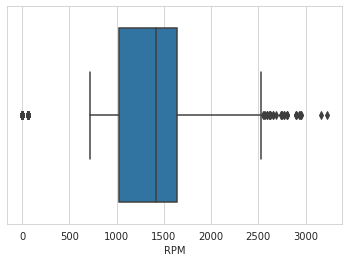

In [ ]:
sns.boxplot(df3['RPM'])

In [ ]:
df3 = df3[df3.RPM < up_lim]
df3 = df3[df3.RPM > low_lim]
df3['RPM'].describe()

count    10928.000000
mean      1389.060029
std        359.953554
min        714.000000
25%       1038.000000
50%       1419.000000
75%       1637.000000
max       2526.000000
Name: RPM, dtype: float64

In [ ]:
df3.describe()

,Speed,RPM,Engine Load
count,10928.000000,10928.000000,10928.000000
mean,34.798133,1389.060029,31.207815
std,19.967533,359.953554,22.674178
min,1.000000,714.000000,0.000000
25%,18.000000,1038.000000,12.000000
50%,34.000000,1419.000000,31.000000
75%,51.000000,1637.000000,46.000000
max,100.000000,2526.000000,100.000000


In [ ]:
df3.shape

(10928, 3)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


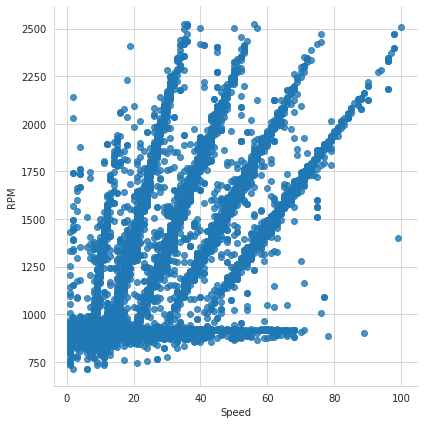

In [ ]:
#scatter plot after remving outliers
sns.set_style('whitegrid')
sns.lmplot('Speed','RPM',data= df3, 
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa16cd30b90>,
      dtype=object)

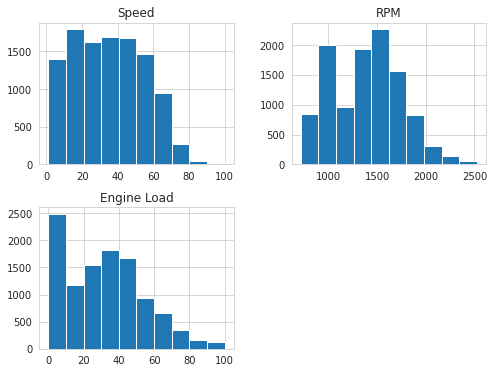

In [ ]:
df3.hist(figsize = (8,6))

## Using the elbow method to find the optimal number of clusters

Standarising using standard scaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(df3[['Speed']])
# df3['Speed'] = scaler.transform(df3[['Speed']])

# scaler.fit(df3[['RPM']])
# df3['RPM'] = scaler.transform(df3[['RPM']])

In [ ]:
df3.head(3)

,Speed,RPM,Engine Load
0,7,898,44
1,7,898,44
2,1,917,32


## Training the K-Means model on the dataset

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("carnot.csv")
mydf = df[['Speed', 'RPM', 'Engine Load']]

In [ ]:
km = KMeans(n_clusters=6, init = 'random')
y_predicted = km.fit_predict(mydf)
y_predicted

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
df.describe()

,Id,Speed,RPM,Engine Load
count,13726.000000,13726.000000,13726.000000,13726.000000
mean,454117.188912,28.282821,1224.099301,31.287119
std,217035.672940,22.714017,504.335148,22.677319
min,131501.000000,0.000000,0.000000,0.000000
25%,269089.250000,7.000000,894.000000,10.000000
50%,378304.500000,27.000000,1295.000000,32.000000
75%,673087.750000,47.000000,1586.000000,47.000000
max,778837.000000,200.000000,3290.000000,100.000000


In [ ]:
df['cluster']=y_predicted
df.head(10)

,Id,Speed,RPM,Engine Load,cluster
0,131505,7,898,44,2
1,133384,7,898,44,2
2,131504,1,917,32,2
3,133424,1,917,32,2
4,131503,0,774,38,2
5,133468,0,774,38,2
6,131502,0,776,38,2
7,133495,0,776,38,2
8,133523,0,782,39,2
9,131501,0,782,39,2


In [ ]:
km.cluster_centers_

array([[4.78462658e+01, 1.79338312e+03, 3.07230844e+01],
       [5.94463277e+00, 2.12881356e+00, 7.31525424e+00],
       [9.16988501e+00, 8.63261879e+02, 4.11238880e+01],
       [3.06328294e+01, 1.25813477e+03, 2.85118790e+01],
       [5.06442688e+01, 2.21889723e+03, 3.78932806e+01],
       [4.34413258e+01, 1.51926814e+03, 2.53517468e+01]])

In [ ]:
data1 = df[df.cluster==0]
data2 = df[df.cluster==1]
data3 = df[df.cluster==2]
data4 = df[df.cluster==3]
data5 = df[df.cluster==4]
data6 = df[df.cluster==5]

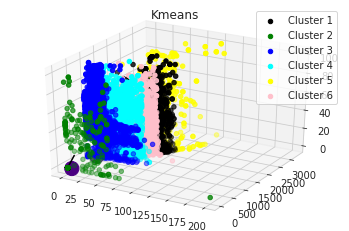

In [ ]:
kplot = plt.axes(projection='3d')

xline = np.linspace(0, 10, 200)
yline = np.linspace(0, 15, 200)
zline = np.linspace(0, 15, 200)

kplot.plot3D(xline, yline, zline, 'black')

# Data for three-dimensional scattered points
kplot.scatter3D(data1['Speed'], data1['RPM'], data1['Engine Load'], c='black', label = 'Cluster 1')
kplot.scatter3D(data2['Speed'], data2['RPM'], data2['Engine Load'], c='green', label = 'Cluster 2')
kplot.scatter3D(data3['Speed'], data3['RPM'], data3['Engine Load'], c='blue', label = 'Cluster 3')
kplot.scatter3D(data4['Speed'], data4['RPM'], data4['Engine Load'], c='cyan', label = 'Cluster 4')
kplot.scatter3D(data5['Speed'], data5['RPM'], data5['Engine Load'], c='yellow', label = 'Cluster 5')
kplot.scatter3D(data6['Speed'], data6['RPM'], data6['Engine Load'], c='pink', label = 'Cluster 6')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'indigo', s = 200)
plt.legend()
plt.title("Kmeans")
plt.show()


## Visualising the clusters

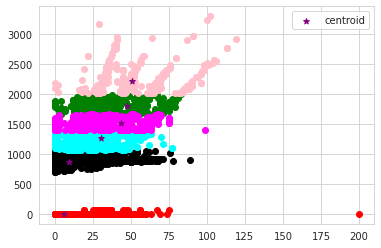

In [ ]:
from pandas.core.arrays.datetimes import DT64NS_DTYPE
d1 = df[df.cluster==0]
d2 = df[df.cluster==1]
d3 = df[df.cluster==2]
d4 = df[df.cluster==3]
d5 = df[df.cluster==4]
d6 = df[df.cluster==5]
plt.scatter(d1.Speed,d1['RPM'],color='green')
plt.scatter(d2.Speed,d2['RPM'],color='red')
plt.scatter(d3.Speed,d3['RPM'],color='black')
plt.scatter(d4.Speed,d4['RPM'],color='cyan')
plt.scatter(d5.Speed,d5['RPM'],color='pink')
plt.scatter(d6.Speed,d6['RPM'],color='magenta')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

Trying DBSCAN if its working differntly than k means

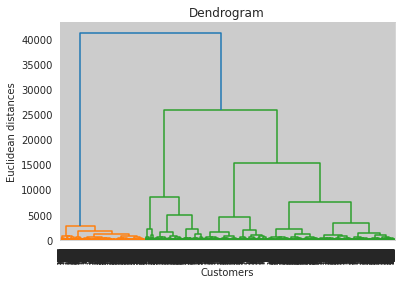

In [ ]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df3, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
from sklearn.cluster import DBSCAN

In [ ]:
df=pd.read_csv('/content/carnot.csv')
x=df.loc[:,['Speed', 'RPM']].values
print(x.shape)

(13726, 2)


In [ ]:
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(x) # fitting the data to the object
distances,indices=nbrs.kneighbors(x)

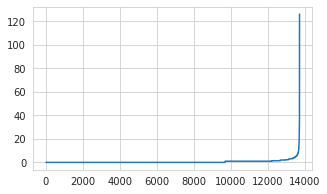

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [ ]:

clustering  = DBSCAN(eps=9, min_samples=4).fit(df)
DBSCAN_df = df.copy()
DBSCAN_df.loc[:,'Cluster'] = clustering.labels_
DBSCAN_df.Cluster.value_counts().to_frame()

,Cluster
-1,11887
289,43
302,31
303,30
115,28
...,...
100,4
55,4
56,4
57,4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


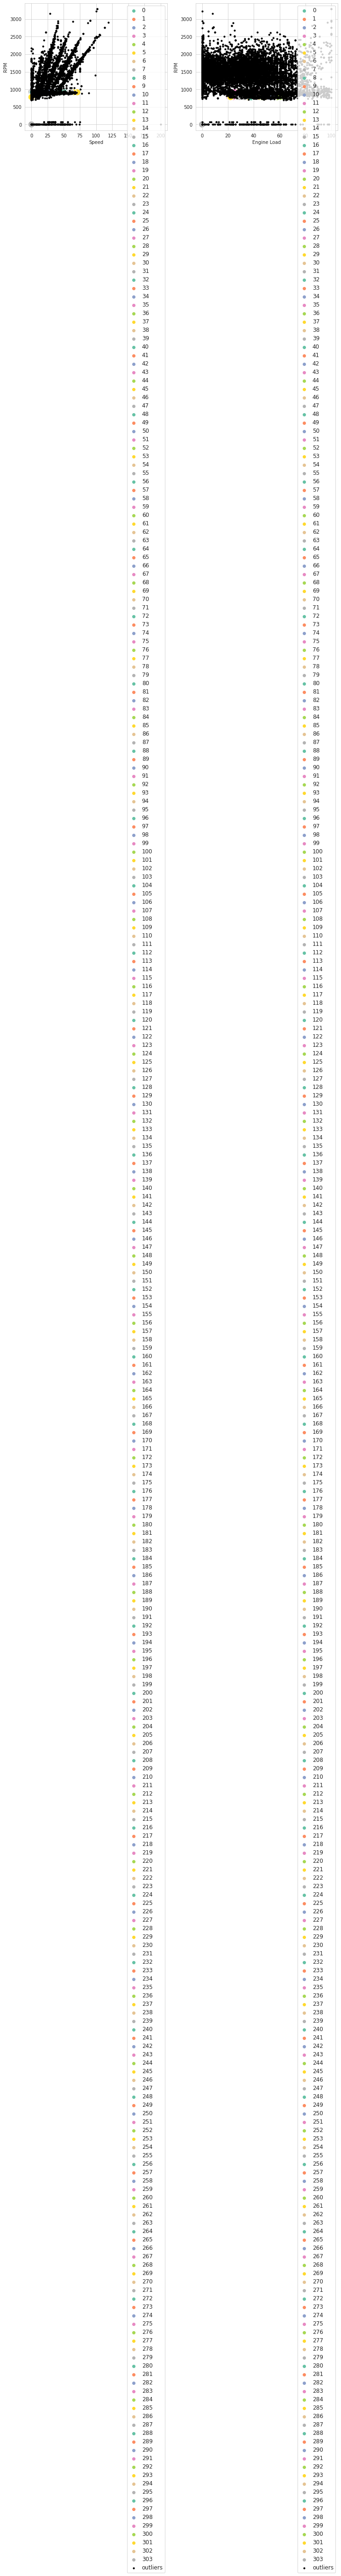

In [ ]:
outliers = DBSCAN_df[DBSCAN_df['Cluster']==-1]

fig2, (axes) = plt.subplots(1,2,figsize=(12,5))

sns.scatterplot('Speed', 'RPM',
                data=DBSCAN_df[DBSCAN_df['Cluster']!=-1], hue='Cluster', 
                ax=axes[0],palette='Set2', legend='full', s=200)

sns.scatterplot('Engine Load', 'RPM',
                data=DBSCAN_df[DBSCAN_df['Cluster']!=-1],
                hue='Cluster', palette='Set2', ax=axes[1], legend='full', s=200)

axes[0].scatter(outliers['Speed'], outliers['RPM'], s=10, label='outliers', c="k")

axes[1].scatter(outliers['Engine Load'], outliers['RPM'], s=10, label='outliers', c="k")
axes[0].legend()
axes[1].legend()

plt.setp(axes[0].get_legend().get_texts(), fontsize='12')
plt.setp(axes[1].get_legend().get_texts(), fontsize='12')

plt.show()

Manual

In [ ]:
df['RPM/Speed'] = df['RPM']/df['Speed']

In [ ]:
df['Speed/RPM'] = df['Speed']/df['RPM']

In [ ]:
df['RPM/Speed'].value_counts()

inf           1875
0.000000        78
32.000000       53
45.000000       29
32.500000       28
              ... 
28.060606        1
47.058824        1
30.387097        1
43.047619        1
309.666667       1
Name: RPM/Speed, Length: 5697, dtype: int64

In [ ]:
df['Speed/RPM'].value_counts()

0.000000    1875
inf           78
0.031250      53
0.022222      29
0.030769      28
            ... 
0.035637       1
0.021250       1
0.032909       1
0.023230       1
0.003229       1
Name: Speed/RPM, Length: 5697, dtype: int64

In [ ]:
qdf = df.query('Speed/RPM < 100 and Speed/RPM > 0 and RPM/Speed <250')

In [ ]:
qdf.shape

(10579, 6)

In [ ]:
qdf.describe()

,Id,Speed,RPM,Engine Load,RPM/Speed,Speed/RPM
count,10579.000000,10579.000000,10579.000000,10579.000000,10579.000000,10579.000000
mean,460473.842613,36.345212,1403.753663,30.708385,53.185877,0.073040
std,213958.583248,19.275346,380.275679,22.854388,36.491819,0.800631
min,131505.000000,4.000000,3.000000,0.000000,0.047619,0.004002
25%,270314.500000,20.000000,1118.500000,11.000000,31.879024,0.014312
50%,458935.000000,36.000000,1434.000000,30.000000,44.571429,0.022436
75%,672995.500000,51.000000,1646.000000,45.000000,69.872283,0.031369
max,778682.000000,119.000000,3290.000000,100.000000,249.857143,21.000000


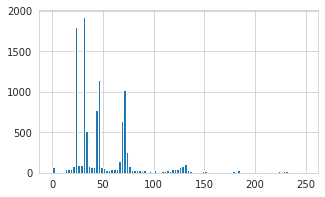

In [ ]:
qdf['RPM/Speed'].hist(bins=100)

Training Gausian distribution

In [ ]:
# training gaussian mixture model 
df4 = df.drop(['Id', 'Engine Load', 'RPM/Speed', 'Speed/RPM'], axis = 1)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6)
gmm.fit(df4)

GaussianMixture(n_components=6)

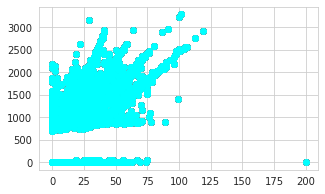

In [ ]:
#predictions from gmm
labels = gmm.predict(df4)
df4['cluster'] = labels
df4.columns = ['Speed', 'RPM', 'cluster']

color=['blue','green','cyan', 'black', 'pink','cyan']
for k in range(0,6):
    data = df4[df4["cluster"]==k]
    plt.scatter(df4["Speed"],df4["RPM"],c=color[k])
plt.show()